In [38]:
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from datetime import datetime, timedelta

In [39]:
#read and rename columns for yearly data
yearly_data = pd.read_csv('SN_y_tot_V2.0.csv', sep=';' , header=None)
yearly_data.columns= ['year','sunspot_number','std_dev', 'observations', 'indicator']

In [40]:
print(yearly_data.head())

     year  sunspot_number  std_dev  observations  indicator
0  1700.5             8.3     -1.0            -1          1
1  1701.5            18.3     -1.0            -1          1
2  1702.5            26.7     -1.0            -1          1
3  1703.5            38.3     -1.0            -1          1
4  1704.5            60.0     -1.0            -1          1


In [41]:
#data_preprocessing function to handle missing values and convert input format for prophet
def data_preprocessing(data, time_unit):
    #removing missing values -1
    data = data[data['sunspot_number']>=0]
    #convert to datetime
    if(time_unit== 'daily'):
        data['ds'] = pd.to_datetime(data[['year','month','day']])
    elif(time_unit== 'monthly'):
        data['ds'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
    elif(time_unit== 'yearly'):
        #handling float value(mid-year date)
         # Convert fractional year to datetime directly inside this function
        def fractional_year_to_date(year):
            base_year = int(year)
            fraction = year - base_year
            # Approximate the fraction as days (365.25 days for leap year consideration)
            days = int(fraction * 365.25)
            return datetime(base_year, 1, 1) + timedelta(days=days)
        
        # Apply transformation for yearly time unit
        data['ds'] = data['year'].apply(fractional_year_to_date)
    #keep only required columns
    data=data[['ds','sunspot_number']].rename(columns={'sunspot_number':'y'})
    
    return data

In [42]:
yearly_clean = data_preprocessing(yearly_data, 'yearly')

In [43]:
yearly_clean.tail()

,ds,y
317,2017-07-02,21.7
318,2018-07-02,7.0
319,2019-07-02,3.6
320,2020-07-01,8.8
321,2021-07-02,29.6


In [44]:
yearly_clean = yearly_clean[yearly_clean['ds'].dt.year.between(1800, 2100)]

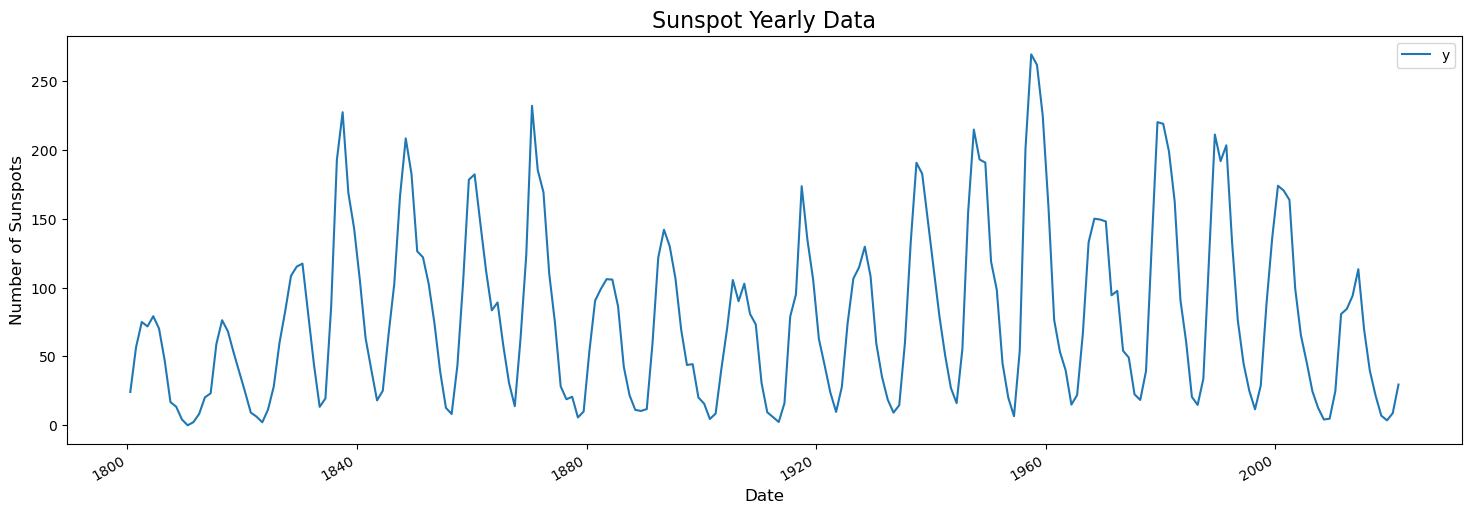

In [45]:
az = yearly_clean.plot(x='ds', y= 'y', figsize=(18,6))
az.set_title('Sunspot Yearly Data', fontsize=16)  # Add title with font size
az.set_xlabel('Date', fontsize=12)  # Optional: Customize x-axis label
az.set_ylabel('Number of Sunspots', fontsize=12)  # Optional: Customize y-axis label
plt.show()

In [46]:
len(yearly_clean)

222

## Train, Test Split

In [48]:
train = yearly_clean.iloc[:len(yearly_clean)-20]
test = yearly_clean.iloc[len(yearly_clean)-20:]

## Making Predictions 10/20 years into the future

In [50]:
from prophet.plot import plot_plotly, plot_components_plotly

In [51]:
# Initialize Prophet model
model = Prophet()
model.fit(yearly_clean)  # Fit the model to the entire dataset

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=20, freq='Y') 

# Forecast future values
forecast = model.predict(future)

15:23:59 - cmdstanpy - INFO - Chain [1] start processing
15:23:59 - cmdstanpy - INFO - Chain [1] done processing


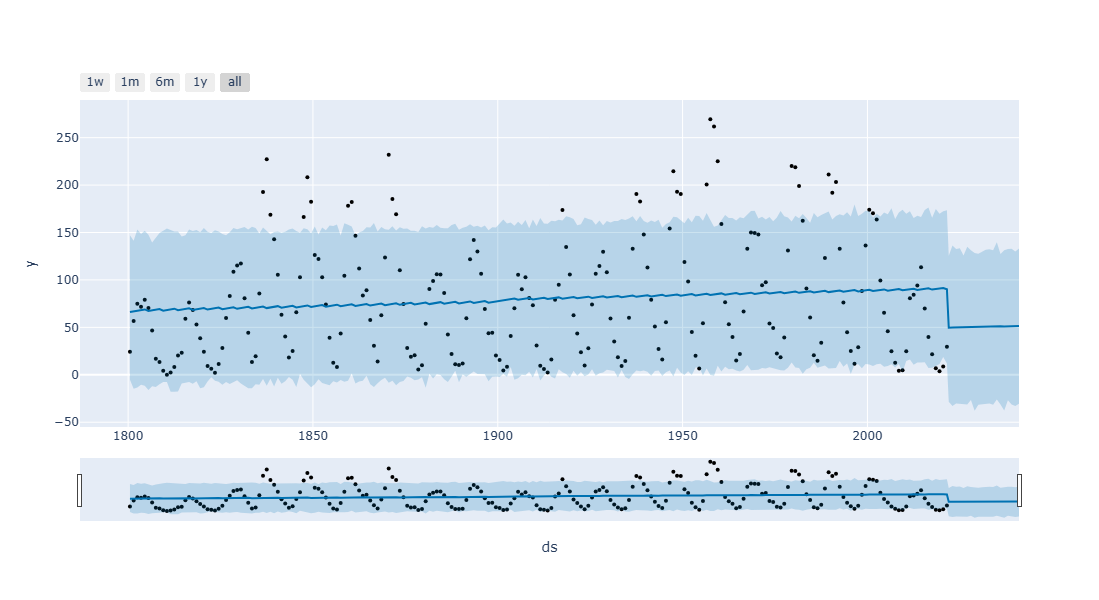

In [52]:
# Plot the forecast
plot_plotly(model ,forecast)

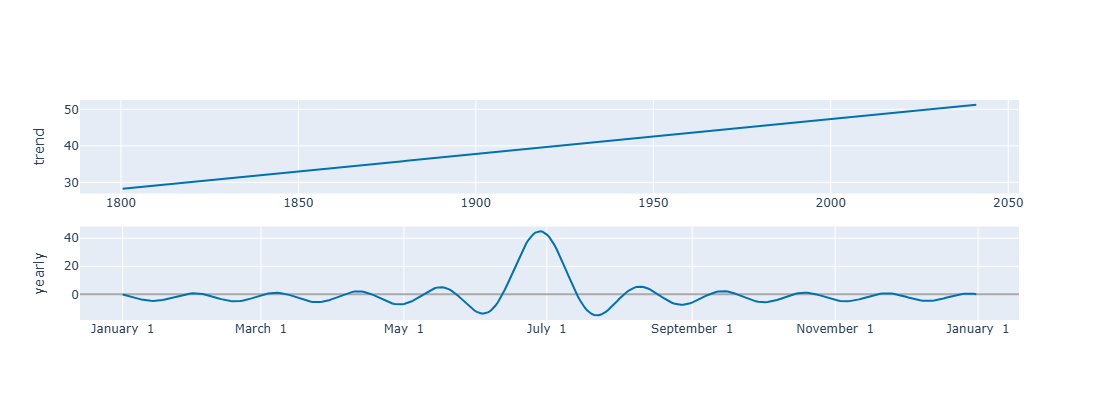

In [53]:
plot_components_plotly(model, forecast)

In [54]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
222,2021-12-31,49.452004,-28.428883,125.579607,49.452004,49.452004,0.206082,0.206082,0.206082,0.206082,0.206082,0.206082,0.0,0.0,0.0,49.658086
223,2022-12-31,49.547263,-32.941340,136.266271,49.547263,49.547265,0.266646,0.266646,0.266646,0.266646,0.266646,0.266646,0.0,0.0,0.0,49.813909
224,2023-12-31,49.642523,-30.349983,132.716616,49.642511,49.642533,0.322547,0.322547,0.322547,0.322547,0.322547,0.322547,0.0,0.0,0.0,49.965070
225,2024-12-31,49.738043,-30.750714,133.326842,49.738014,49.738065,0.140978,0.140978,0.140978,0.140978,0.140978,0.140978,0.0,0.0,0.0,49.879021
226,2025-12-31,49.833302,-31.100504,125.632819,49.833260,49.833343,0.206082,0.206082,0.206082,0.206082,0.206082,0.206082,0.0,0.0,0.0,50.039385
227,2026-12-31,49.928562,-31.239555,135.053600,49.928504,49.928624,0.266646,0.266646,0.266646,0.266646,0.266646,0.266646,0.0,0.0,0.0,50.195208
228,2027-12-31,50.023821,-26.599045,131.196643,50.023735,50.023907,0.322547,0.322547,0.322547,0.322547,0.322547,0.322547,0.0,0.0,0.0,50.346368
229,2028-12-31,50.119342,-37.814260,128.510827,50.119236,50.119458,0.140978,0.140978,0.140978,0.140978,0.140978,0.140978,0.0,0.0,0.0,50.260319
230,2029-12-31,50.214601,-31.623404,127.546095,50.214465,50.214749,0.206082,0.206082,0.206082,0.206082,0.206082,0.206082,0.0,0.0,0.0,50.420683
231,2030-12-31,50.309861,-31.405231,129.514056,50.309696,50.310042,0.266646,0.266646,0.266646,0.266646,0.266646,0.266646,0.0,0.0,0.0,50.576507


## Evaluate Predictions_1

In [56]:
# Train the model on training data
model = Prophet()
model.fit(train)

# Create a DataFrame for predictions on the test set
future_test = test[['ds']]  # Use test data dates for prediction
forecast_test = model.predict(future_test)

# Actual values
y_actual = test['y'].values

# Predicted values
y_pred = forecast_test['yhat'].values

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MAPE (Using Scikit-learn)
mape = mean_absolute_percentage_error(y_actual, y_pred) * 100  # Multiply by 100 to express as a percentage

# R² Score
r2 = r2_score(y_actual, y_pred)
# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R² Score: {r2}")

15:24:00 - cmdstanpy - INFO - Chain [1] start processing
15:24:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 72.80828454718328
Mean Absolute Percentage Error (MAPE): 704.1183009879694%
R² Score: -2.494873997775534


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into train and test sets
train = yearly_clean.iloc[:-20]  # Use all but the last year for training
test = yearly_clean.iloc[-20:]  # Last year for testing

# Function to evaluate predictions
def evaluate_forecast(y_actual, y_pred):
    # Filter out zero values in y_actual to avoid MAPE errors
    non_zero_mask = y_actual != 0
    y_actual_filtered = y_actual[non_zero_mask]
    y_pred_filtered = y_pred[non_zero_mask]
    
    mae = mean_absolute_error(y_actual_filtered, y_pred_filtered)
    mape = np.mean(np.abs((y_actual_filtered - y_pred_filtered) / y_actual_filtered)) * 100
    r2 = r2_score(y_actual_filtered, y_pred_filtered)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")
    return mae, mape, r2

# Iterate through different parameter combinations
growth_types = ['linear', 'flat']
changepoint_prior_scales = [0.01, 0.05]
n_changepoints_values = [10, 25]
fourier_orders = [2, 3]

# Initialize variables to store best metrics and configurations
best_mae = float('inf')
best_mape = float('inf')
best_r2 = float('-inf')

best_config_mae = None
best_config_mape = None
best_config_r2 = None

for growth in growth_types:
    for cps in changepoint_prior_scales:
        for n_changepoints in n_changepoints_values:
            for fourier_order in fourier_orders:
                print(f"\nTesting: growth={growth}, cps={cps}, n_changepoints={n_changepoints}, fourier_order={fourier_order}")
                
                # Initialize the model
                model = Prophet(
                    growth=growth,
                    changepoint_prior_scale=cps,
                    n_changepoints=n_changepoints
                )
                
                # Add custom seasonality
                model.add_seasonality(name='solar_cycle', period=11, fourier_order=fourier_order)
                
                # Add a cap for logistic growth (required if growth='logistic')
                if growth == 'logistic':
                    train['cap'] = 300 
                    test['cap'] = 300
                
                # Fit the model
                model.fit(train)
                
                # Forecast for test dates
                future = test[['ds']]
                if growth == 'logistic':
                    future['cap'] = 300  # Add cap for future if logistic growth
                
                forecast = model.predict(future)
                
                # Evaluate the forecast
                y_actual = test['y'].values
                y_pred = forecast['yhat'].values
                mae, mape, r2 = evaluate_forecast(y_actual, y_pred)
                
                # Track the best configurations for each metric
                if mae < best_mae:
                    best_mae = mae
                    best_config_mae = (growth, cps, n_changepoints, fourier_order)
                
                if mape < best_mape:
                    best_mape = mape
                    best_config_mape = (growth, cps, n_changepoints, fourier_order)
                
                if r2 > best_r2:  # Higher R² is better
                    best_r2 = r2
                    best_config_r2 = (growth, cps, n_changepoints, fourier_order)

# Print the best configurations
print("\nBest Configuration for MAE:")
print(f"Growth: {best_config_mae[0]}, Changepoint Prior Scale: {best_config_mae[1]}, "
      f"n_changepoints: {best_config_mae[2]}, Fourier Order: {best_config_mae[3]}")
print(f"Best MAE: {best_mae}")

print("\nBest Configuration for MAPE:")
print(f"Growth: {best_config_mape[0]}, Changepoint Prior Scale: {best_config_mape[1]}, "
      f"n_changepoints: {best_config_mape[2]}, Fourier Order: {best_config_mape[3]}")
print(f"Best MAPE: {best_mape:.2f}%")

print("\nBest Configuration for R²:")
print(f"Growth: {best_config_r2[0]}, Changepoint Prior Scale: {best_config_r2[1]}, "
      f"n_changepoints: {best_config_r2[2]}, Fourier Order: {best_config_r2[3]}")
print(f"Best R² Score: {best_r2:.4f}")

15:24:01 - cmdstanpy - INFO - Chain [1] start processing



Testing: growth=linear, cps=0.01, n_changepoints=10, fourier_order=2


15:24:01 - cmdstanpy - INFO - Chain [1] done processing
15:24:01 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 84.67764762850759
Mean Absolute Percentage Error (MAPE): 789.98%
R² Score: -3.5218

Testing: growth=linear, cps=0.01, n_changepoints=10, fourier_order=3


15:24:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 81.04154424266918
Mean Absolute Percentage Error (MAPE): 771.13%
R² Score: -3.1955

Testing: growth=linear, cps=0.01, n_changepoints=25, fourier_order=2


15:24:02 - cmdstanpy - INFO - Chain [1] start processing
15:24:02 - cmdstanpy - INFO - Chain [1] done processing
15:24:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 75.1165269494297
Mean Absolute Percentage Error (MAPE): 716.90%
R² Score: -2.6767

Testing: growth=linear, cps=0.01, n_changepoints=25, fourier_order=3


15:24:03 - cmdstanpy - INFO - Chain [1] done processing
15:24:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 71.96851451738567
Mean Absolute Percentage Error (MAPE): 703.74%
R² Score: -2.4457

Testing: growth=linear, cps=0.05, n_changepoints=10, fourier_order=2


15:24:03 - cmdstanpy - INFO - Chain [1] done processing
15:24:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 73.01360469241071
Mean Absolute Percentage Error (MAPE): 702.04%
R² Score: -2.5038

Testing: growth=linear, cps=0.05, n_changepoints=10, fourier_order=3


15:24:03 - cmdstanpy - INFO - Chain [1] done processing
15:24:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 71.1889739028849
Mean Absolute Percentage Error (MAPE): 695.84%
R² Score: -2.3710

Testing: growth=linear, cps=0.05, n_changepoints=25, fourier_order=2


15:24:04 - cmdstanpy - INFO - Chain [1] done processing
15:24:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 73.50118729739054
Mean Absolute Percentage Error (MAPE): 705.73%
R² Score: -2.5445

Testing: growth=linear, cps=0.05, n_changepoints=25, fourier_order=3


15:24:04 - cmdstanpy - INFO - Chain [1] done processing
15:24:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 74.56309154252476
Mean Absolute Percentage Error (MAPE): 721.25%
R² Score: -2.6397

Testing: growth=flat, cps=0.01, n_changepoints=10, fourier_order=2


15:24:04 - cmdstanpy - INFO - Chain [1] done processing
15:24:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.44287479057978
Mean Absolute Percentage Error (MAPE): 521.97%
R² Score: -0.8823

Testing: growth=flat, cps=0.01, n_changepoints=10, fourier_order=3


15:24:05 - cmdstanpy - INFO - Chain [1] done processing
15:24:05 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.13667092829802
Mean Absolute Percentage Error (MAPE): 530.09%
R² Score: -0.9086

Testing: growth=flat, cps=0.01, n_changepoints=25, fourier_order=2


15:24:05 - cmdstanpy - INFO - Chain [1] done processing
15:24:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.44287479057978
Mean Absolute Percentage Error (MAPE): 521.97%
R² Score: -0.8823

Testing: growth=flat, cps=0.01, n_changepoints=25, fourier_order=3


15:24:06 - cmdstanpy - INFO - Chain [1] done processing
15:24:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.13667092829802
Mean Absolute Percentage Error (MAPE): 530.09%
R² Score: -0.9086

Testing: growth=flat, cps=0.05, n_changepoints=10, fourier_order=2


15:24:06 - cmdstanpy - INFO - Chain [1] done processing
15:24:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.44287479057978
Mean Absolute Percentage Error (MAPE): 521.97%
R² Score: -0.8823

Testing: growth=flat, cps=0.05, n_changepoints=10, fourier_order=3


15:24:07 - cmdstanpy - INFO - Chain [1] done processing
15:24:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.13667092829802
Mean Absolute Percentage Error (MAPE): 530.09%
R² Score: -0.9086

Testing: growth=flat, cps=0.05, n_changepoints=25, fourier_order=2


15:24:07 - cmdstanpy - INFO - Chain [1] done processing
15:24:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 52.44287479057978
Mean Absolute Percentage Error (MAPE): 521.97%
R² Score: -0.8823

Testing: growth=flat, cps=0.05, n_changepoints=25, fourier_order=3


15:24:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 52.13667092829802
Mean Absolute Percentage Error (MAPE): 530.09%
R² Score: -0.9086

Best Configuration for MAE:
Growth: flat, Changepoint Prior Scale: 0.01, n_changepoints: 10, Fourier Order: 3
Best MAE: 52.13667092829802

Best Configuration for MAPE:
Growth: flat, Changepoint Prior Scale: 0.01, n_changepoints: 10, Fourier Order: 2
Best MAPE: 521.97%

Best Configuration for R²:
Growth: flat, Changepoint Prior Scale: 0.01, n_changepoints: 10, Fourier Order: 2
Best R² Score: -0.8823


In [77]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
0,2002-07-02,83.719048,2.504994,163.048779
1,2003-07-02,89.910511,11.351778,166.951268
2,2004-07-01,100.169976,22.601923,183.658580
3,2005-07-02,73.384858,-8.160041,159.009380
4,2006-07-02,100.488286,24.843438,184.894137
5,2007-07-02,87.773072,8.047249,170.974607
6,2008-07-01,93.951972,8.798968,172.823578
7,2009-07-02,91.015210,7.269542,172.768870
8,2010-07-02,77.446516,-5.789931,153.100865
9,2011-07-02,104.542310,20.780989,184.488313
